## Exploratory Data Analysis - Sports 

# NOTE:- This is only a reference file. you do not need to copy this file exactly you can analyze your data in your own way

In this task, we will be performing exploratory data analysis on the dataset "Sport" and try to find out the best team in IPL. Also, we will find the best bolwer and various insights.

The steps demonstrated in this notebook are:

 1. Loading the data
 2. Familiarizing with data
 3. Visualizing the data
 4. Data Analysis
 5. Conclusion

## 1. Loading Data:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#Loading data into dataframe
dele=pd.read_csv('deliveries.csv')
match=pd.read_csv('matches.csv')

In [9]:
dele.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [27]:
match['team1_win']=np.where(match['team1']==match['winner'],1,0)
match['team2_win']=np.where(match['team2']==match['winner'],1,0)

In [28]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team2_win
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,0,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,0,1
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,0,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,0


In [21]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [29]:
match.groupby(['team1','team2']).agg({'id':'count','team1_win':'sum','team2_win':'sum'})

id  team1_win  team2_win
team1                       team2                                                
Chennai Super Kings         Deccan Chargers               8          5          3
                            Delhi Capitals                1          1          0
                            Delhi Daredevils             12          8          4
                            Kings XI Punjab              11          7          4
                            Kochi Tuskers Kerala          2          1          1
                            Kolkata Knight Riders        12          5          7
                            Mumbai Indians               12          5          7
                            Pune Warriors                 4          3          1
                            Rajasthan Royals             12          7          5
                            Royal Challengers Bangalore  10          6          4
                            Sunrisers Hyderabad           5          3          2
Deccan Chargers             Chennai Super Kings           2          1          1
                            Delhi Daredevils              8          3          5
                            Kings XI Punjab               7          2          5
                            Kochi Tuskers Kerala          1          1          0
                            Kolkata Knight Riders         2          0          2
                            Mumbai Indians                5          3          2
                            Pune Warriors                 3          2          1
                            Rajasthan Royals              7          1          6
                            Royal Challengers Bangalore   8          5          3
Delhi Capitals              Chennai Super Kings           2          0          2
                            Mumbai Indians                1          1          0
                            Royal Challengers Bangalore   1          1          0
                            Sunrisers Hyderabad           2          1          1
Delhi Daredevils            Chennai Super Kings           6          2          4
                            Deccan Chargers               3          2          1
                            Kings XI Punjab              11          2          9
                            Kochi Tuskers Kerala          2          1          1
                            Kolkata Knight Riders        10          3          7
                            Mumbai Indians                6          4          2
                            Pune Warriors                 2          1          0
                            Rajasthan Royals             10          4          6
                            Rising Pune Supergiant        2          2          0
                            Rising Pune Supergiants       2          0          2
                            Royal Challengers Bangalore  12          3          8
                            Sunrisers Hyderabad           6          1          5
Gujarat Lions               Delhi Daredevils              4          1          3
                            Kolkata Knight Riders         1          0          1
                            Mumbai Indians                2          0          2
                            Rising Pune Supergiant        1          0          1
                            Royal Challengers Bangalore   1          0          1
                            Sunrisers Hyderabad           5          0          5
Kings XI Punjab             Chennai Super Kings          10          5          5
                            Deccan Chargers               3          2          1
                            Delhi Capitals                2          1          1
                            Delhi Daredevils             11          4          7
                            Gujarat Lions                 4          2          2
                            Kolkata Kni

In [40]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
match.groupby(['season','player_of_match']).agg({'id':['count']}).sort_values(by=['season',('id','count')],ascending=False).head(500)

id
                         count
season player_of_match        
2019   AD Russell            4
       HH Pandya             3
       JJ Bumrah             3
       MS Dhoni              3
       RR Pant               3
       AB de Villiers        2
       DA Warner             2
       Harbhajan Singh       2
       J Bairstow            2
       KL Rahul              2
       S Dhawan              2
       SR Watson             2
       A Joseph              1
       A Mishra              1
       AS Yadav              1
       CH Gayle              1
       DL Chahar             1
       F du Plessis          1
       H Gurney              1
       Imran Tahir           1
       JC Buttler            1
       JD Unadkat            1
       K Ahmed               1
       K Paul                1
       K Rabada              1
       KA Pollard            1
       MA Agarwal            1
       P Shaw                1
       PA Patel              1
       R Ashwin              1
       RG Sharma             1
       Rashid Khan           1
       S Curran              1
       S Gill                1
       S Gopal               1
       S Hetmyer             1
       SL Malinga            1
       SPD Smith             1
       SS Iyer               1
       V Kohli               1
       VR Aaron              1
2018   Rashid Khan           4
       AB de Villiers        3
       JC Buttler            3
       SP Narine             3
       SR Watson             3
       AS Rajpoot            2
       AT Rayudu             2
       CA Lynn               2
       CH Gayle              2
       KL Rahul              2
       KS Williamson         2
       N Rana                2
       RG Sharma             2
       S Dhawan              2
       SV Samson             2
       UT Yadav              2
       A Mishra              1
       AD Russell            1
       AS Yadav              1
       B Stanlake            1
       DJ Bravo              1
       F du Plessis          1
       HH Pandya             1
       HV Patel              1
       Ishan Kishan          1
       J Archer              1
       JJ Bumrah             1
       JJ Roy                1
       Kuldeep Yadav         1
       L Ngidi               1
       M Ur Rahman           1
       MS Dhoni              1
       RA Jadeja             1
       RR Pant               1
       S Gopal               1
       SS Iyer               1
       SW Billings           1
       TG Southee            1
2017   BA Stokes             3
       NM Coulter-Nile       3
       AJ Tye                2
       JD Unadkat            2
       KH Pandya             2
       N Rana                2
       RV Uthappa            2
       Rashid Khan           2
       SP Narine             2
       Sandeep Sharma        2
       AR Patel              1
       AT Rayudu             1
       B Kumar               1
       CA Lynn               1
       CH Gayle              1
       CJ Anderson           1
       DA Warner             1
       DR Smith              1
       G Gambhir             1
       GJ Maxwell            1
       HM Amla               1
       HV Patel              1
       JC Buttler            1
       JJ Bumrah             1
       KA Pollard            1
       KK Nair               1
       KM Jadhav             1
       KS Williamson         1
       KV Sharma             1
       LH Ferguson           1
       LMP Simmons           1
       MJ McClenaghan        1
       MM Sharma             1
       MS Dhoni              1
       Mohammed Shami        1
       Mohammed Siraj        1
       RA Tripathi           1
       RG Sharma             1
       RR Pant               1
       S Dhawan              1
       SK Raina              1
       SPD Smith             1
       SS Iyer               1
       SV Samson             1
       WP Saha               1
       Washington Sundar     1
       Yuvraj Singh          1
2016   V Kohli               

In [43]:
match.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team2_win
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,0,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,0,1
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,0,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,0
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,0,1
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,0,1
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,0,1
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN,1,0
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,0,1


In [42]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team2_win
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,0,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,0,1
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,0,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,0


In [45]:
match[match['toss_decision']=='bat'].groupby(['team1','team2']).agg({'id':'count','team1_win':'sum'})

id  team1_win
team1                       team2                                     
Chennai Super Kings         Deccan Chargers               5          4
                            Delhi Daredevils              7          4
                            Kings XI Punjab               7          6
                            Kochi Tuskers Kerala          1          1
                            Kolkata Knight Riders         7          3
                            Mumbai Indians                5          3
                            Pune Warriors                 2          1
                            Rajasthan Royals              5          2
                            Royal Challengers Bangalore   7          5
                            Sunrisers Hyderabad           2          1
Deccan Chargers             Chennai Super Kings           2          1
                            Delhi Daredevils              6          3
                            Kings XI Punjab               1          0
                            Kolkata Knight Riders         1          0
                            Mumbai Indians                4          3
                            Pune Warriors                 3          2
                            Rajasthan Royals              4          1
                            Royal Challengers Bangalore   3          1
Delhi Capitals              Chennai Super Kings           1          0
                            Royal Challengers Bangalore   1          1
Delhi Daredevils            Chennai Super Kings           2          1
                            Kings XI Punjab               4          1
                            Kochi Tuskers Kerala          1          1
                            Kolkata Knight Riders         4          1
                            Mumbai Indians                3          1
                            Pune Warriors                 1          0
                            Rajasthan Royals              6          3
                            Rising Pune Supergiant        1          1
                            Royal Challengers Bangalore   2          1
                            Sunrisers Hyderabad           5          1
Gujarat Lions               Mumbai Indians                1          0
Kings XI Punjab             Chennai Super Kings           3          1
                            Delhi Daredevils              2          0
                            Kolkata Knight Riders         5          1
                            Mumbai Indians                4          1
                            Pune Warriors                 2          0
                            Rajasthan Royals              3          1
                            Rising Pune Supergiants       1          0
                            Royal Challengers Bangalore   3          1
                            Sunrisers Hyderabad           3          1
Kochi Tuskers Kerala        Pune Warriors                 1          0
                            Royal Challengers Bangalore   2          0
Kolkata Knight Riders       Chennai Super Kings           4          0
                            Deccan Chargers               4          3
                            Delhi Daredevils              7          4
                            Kings XI Punjab               3          1
                            Mumbai Indians                4          1
                            Pune Warriors                 3          3
                            Royal Challengers Bangalore   3          2
                            Sunrisers Hyderabad           2          1
Mumbai Indians              Chennai Super Kings           8          5
                            Deccan Chargers               1          1
                            Delhi Capitals                1          1
                            Delhi Daredevils              5          2
                            Kings XI Punjab               5          2
          

In [ ]:
def bat_first(x):
    if 'toss_winning_team'=='team1':
        if 'toss_decition'=='bat':
            return 'team1'
        else:
            return 'team2'
    elif 'toss_winning_team'=='team2':
        if 'toss_decition'=='bat':
            return 'team2'
        else:
            return 'team1'

In [41]:
match.groupby(['toss_decision','winner']).agg({'winner' : ['count']})


winner
                                           count
toss_decision winner                            
bat           Chennai Super Kings             52
              Deccan Chargers                 14
              Delhi Capitals                   2
              Delhi Daredevils                29
              Gujarat Lions                    2
              Kings XI Punjab                 21
              Kolkata Knight Riders           35
              Mumbai Indians                  45
              Pune Warriors                    9
              Rajasthan Royals                34
              Rising Pune Supergiants          2
              Royal Challengers Bangalore     26
              Sunrisers Hyderabad             21
field         Chennai Super Kings             48
              Deccan Chargers                 15
              Delhi Capitals                   8
              Delhi Daredevils                38
              Gujarat Lions                   11
              Kings XI Punjab                 61
              Kochi Tuskers Kerala             6
              Kolkata Knight Riders           57
              Mumbai Indians                  64
              Pune Warriors                    3
              Rajasthan Royals                41
              Rising Pune Supergiant          10
              Rising Pune Supergiants          3
              Royal Challengers Bangalore     58
              Sunrisers Hyderabad             37

<AxesSubplot:xlabel='team1,team2'>

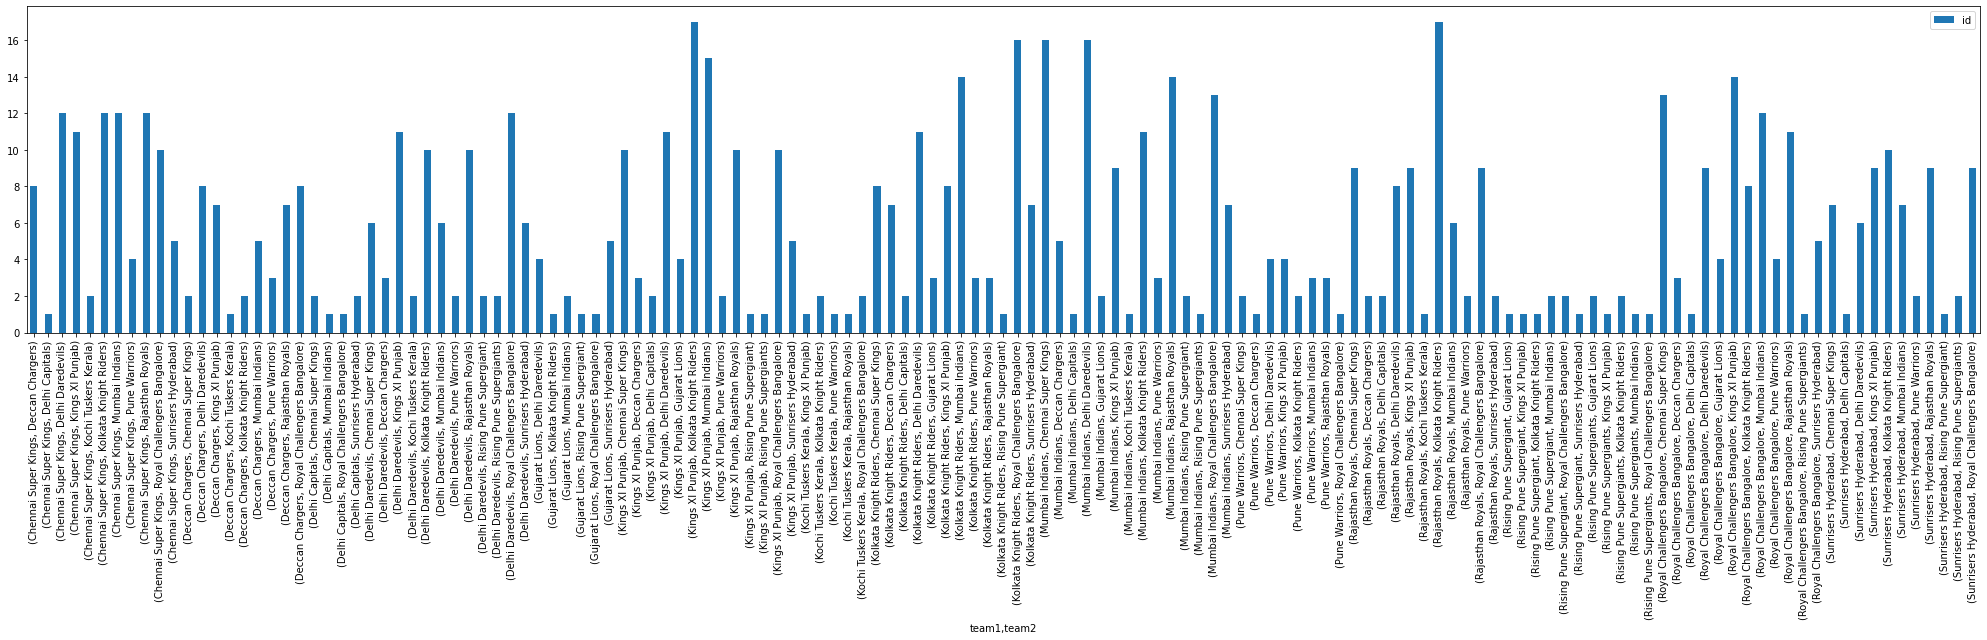

In [18]:
match.groupby(['team1','team2']).agg({'id':'count'}).plot(kind='bar',figsize=(35,6))


## 2. Familiarizing with Data:


### *Analysing Deliveries Dataset*

In [9]:
#Shape of dataframe


In [8]:
#Listing the features of the dataset


In [7]:
#Information about the dataset


In [6]:
#checking for null value


In [5]:
# describtion of dataset


In [4]:
#unique value in dataset
                                

### *Analysing Matches Dataset*

In [10]:
#Shape of dataframe


In [11]:
#Listing the features of the dataset


In [12]:
#Information about the dataset


In [13]:
#checking for null value


In [14]:
# describtion of dataset


In [15]:
#unique value in dataset
                                  

In [17]:
#code

City in which most matches have been won        : Mumbai
Team that has won most matches                  : Mumbai Indians
Player who has been man of the match most times : CH Gayle
Most frequent Umpire 1                          : HDPK Dharmasena
Most frequent Umpire 2                          : C Shamshuddin


In [18]:
#fill null values

In [16]:
#check duplicate values

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

### Finding Top Teams and Players

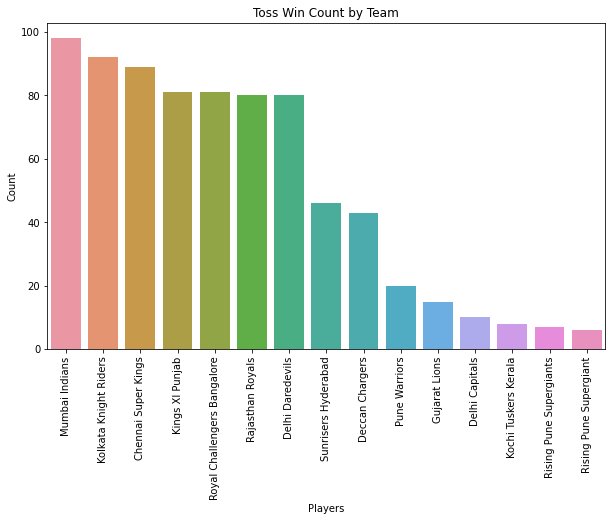

In [21]:
#code

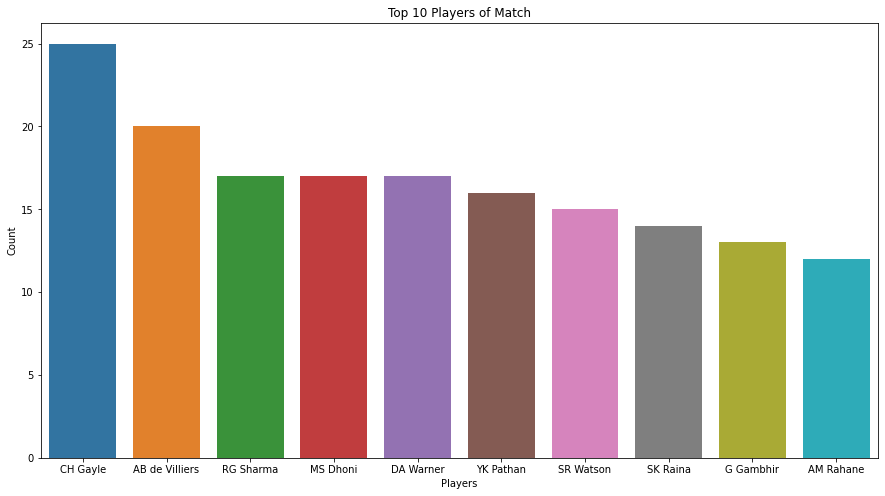

In [22]:
#code

### Finding the Factors Affecting the Victory

In [23]:
#code

,id,season,dl_applied,Bat_1,Ball_1
id,1.000000,0.668304,0.011658,0.039403,0.012239
season,0.668304,1.000000,0.001116,0.037529,0.009379
dl_applied,0.011658,0.001116,1.000000,0.016349,0.011631
Bat_1,0.039403,0.037529,0.016349,1.000000,0.560420
Ball_1,0.012239,0.009379,0.011631,0.560420,1.000000


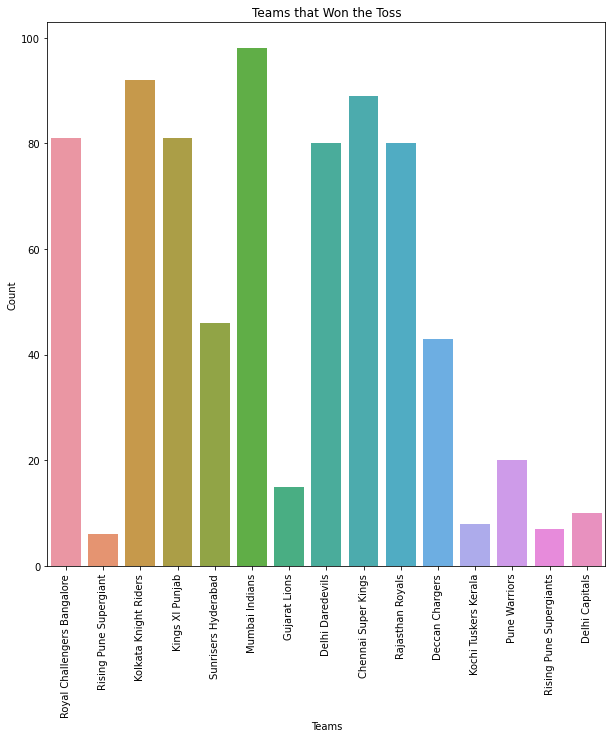

In [26]:
#code

In [27]:
#code

Team that won most matches by Batting First:  Mumbai Indians


## 4. Data Analysis:

### 4.1. Merging the two Datasets into a new Dataset and Reading it (join on match-id)

In [17]:
#code

In [18]:
#check shape

In [19]:
#check duplicate and if any then drop duplicate

### Number of Matches Played in Each Stadium

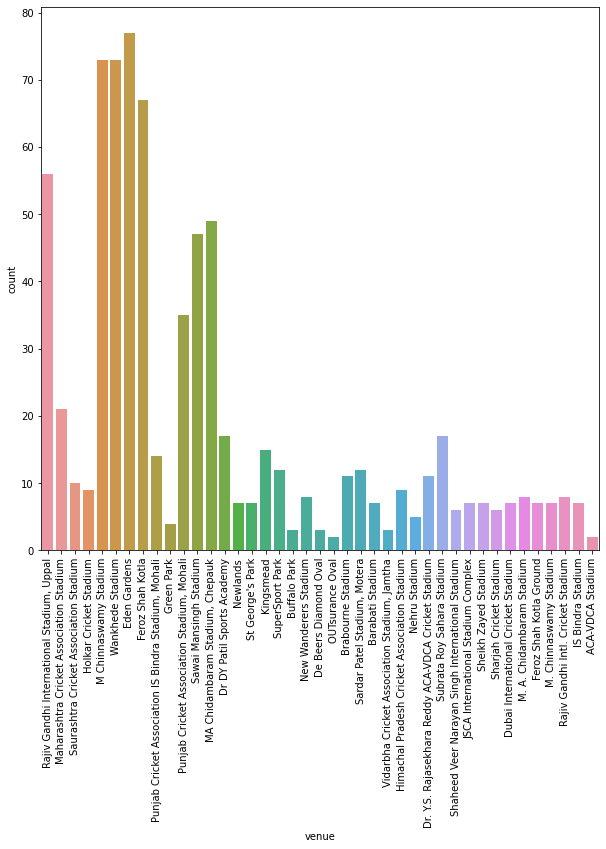

In [36]:
#code

In [37]:
#team Stats

,Teams,Total Matches played,Total won,Toss won,Total lost,Winloss Ratio
0,Chennai Super Kings,164,100,89,64,0.61
1,Deccan Chargers,75,29,43,46,0.39
2,Delhi Capitals,16,10,10,6,0.62
3,Delhi Daredevils,161,67,80,94,0.42
4,Gujarat Lions,30,13,15,17,0.43
5,Kings XI Punjab,176,82,81,94,0.47
6,Kochi Tuskers Kerala,14,6,8,8,0.43
7,Kolkata Knight Riders,178,92,92,86,0.52
8,Mumbai Indians,187,113,98,74,0.60
9,Pune Warriors,46,12,20,34,0.26


### Maximum Toss Won

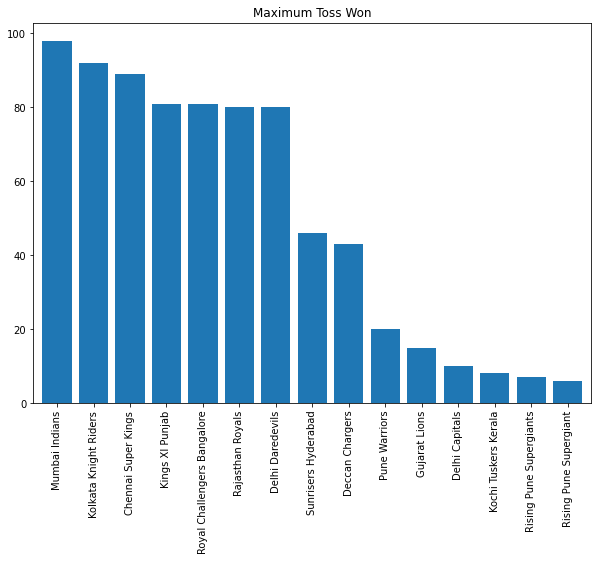

In [38]:
#code

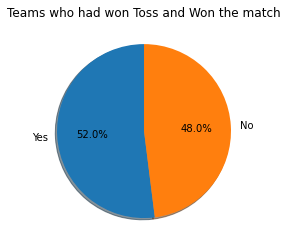

In [39]:
#code

### Deciding Whether to Bat or Field After Winning the Toss

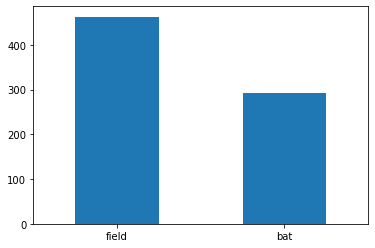

In [40]:
#code

### Relation between Winning toss and victory

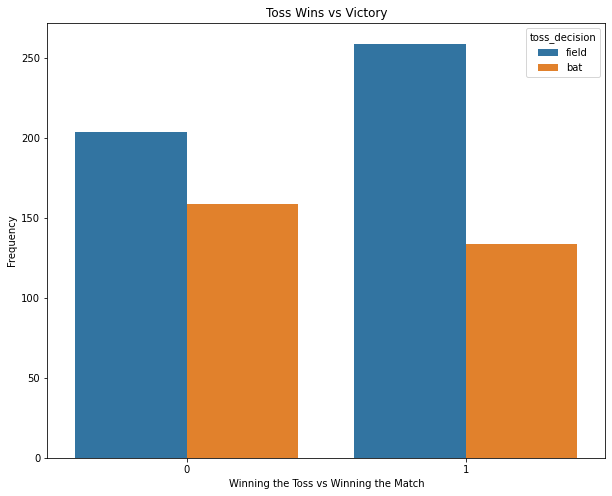

In [41]:
#code

### Batsmen overview

In [42]:
#code

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


In [44]:
#code

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


In [45]:
#code

,balls,runs,batting_strike_rate,0s,4s,1s,6s,3s,2s,5s,7s
batsman,,,,,,,,,,,
V Kohli,4211,5434,129.04,1493,482,1741,191,11,293,0,0
SK Raina,4044,5415,133.90,1381,495,1695,195,11,266,1,0
RG Sharma,3816,4914,128.77,1390,431,1589,194,5,205,1,1
S Dhawan,3776,4632,122.67,1455,526,1473,96,18,205,3,0
G Gambhir,3524,4223,119.84,1351,492,1358,59,15,249,0,0
RV Uthappa,3492,4446,127.32,1382,436,1295,156,13,206,4,0
DA Warner,3398,4741,139.52,1254,459,1213,181,18,271,2,0
MS Dhoni,3318,4477,134.93,1111,297,1383,207,14,304,0,2
AM Rahane,3215,3850,119.75,1198,405,1308,74,15,214,1,0


In [47]:
#code

,balls,runs,batting_strike_rate,0s,4s,1s,6s,3s,2s,5s,7s,matches_played,average,6s/match,4s/match
batsman,,,,,,,,,,,,,,,
V Kohli,4211,5434,129.04,1493,482,1741,191,11,293,0,0,169,32.153846,1.130178,2.852071
SK Raina,4044,5415,133.90,1381,495,1695,195,11,266,1,0,189,28.650794,1.031746,2.619048
RG Sharma,3816,4914,128.77,1390,431,1589,194,5,205,1,1,182,27.000000,1.065934,2.368132
S Dhawan,3776,4632,122.67,1455,526,1473,96,18,205,3,0,158,29.316456,0.607595,3.329114
G Gambhir,3524,4223,119.84,1351,492,1358,59,15,249,0,0,151,27.966887,0.390728,3.258278


# Total runs by each batsmen

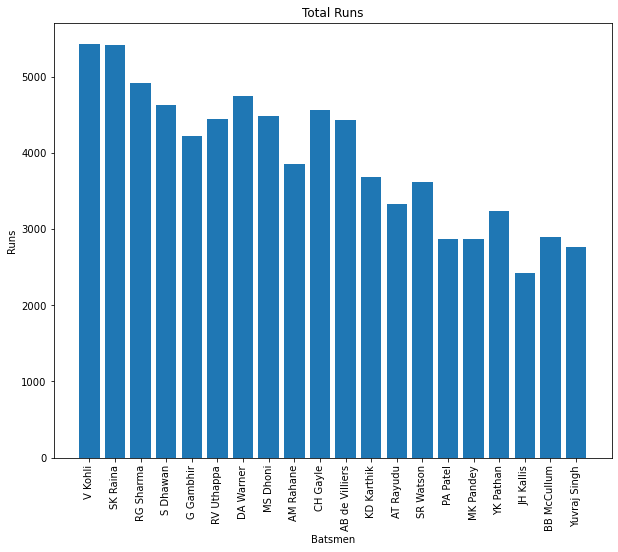

In [48]:
#code


# Each batsmen strike rate

In [20]:
#code

# Top 5 Batsmen

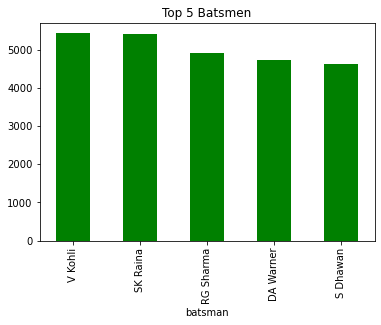

In [50]:
#code

### Bowler information

In [51]:
#code

,runs,balls,wickets
bowler,,,
SL Malinga,2974,3511,188
DJ Bravo,2711,3733,168
A Mishra,3172,3850,165
Harbhajan Singh,3451,4050,161
PP Chawla,3157,4153,156
B Kumar,2707,3264,141
R Ashwin,3016,3391,138
SP Narine,2600,2939,137
UT Yadav,2605,3640,136


In [52]:
#code

,runs,balls,wickets,economy
bowler,,,,
UT Yadav,2605,3640,136,4.293956
R Vinay Kumar,2186,3043,127,4.310220
MM Sharma,1770,2457,99,4.322344
DJ Bravo,2711,3733,168,4.357353
PP Chawla,3157,4153,156,4.561040
YS Chahal,1841,2416,102,4.572020
RP Singh,1874,2417,100,4.652048
SR Watson,2137,2751,107,4.660851
A Nehra,1974,2537,121,4.668506


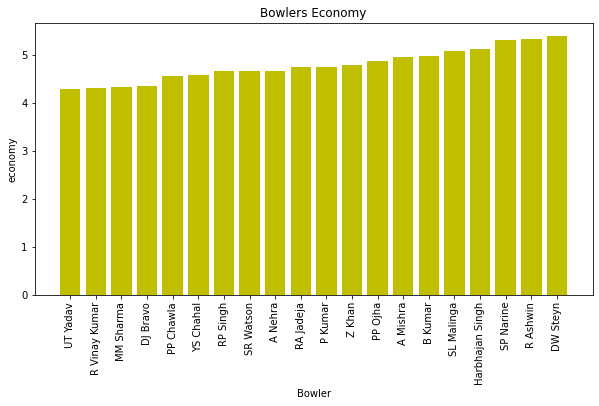

In [53]:
#code

# Wickets taken by a bowler

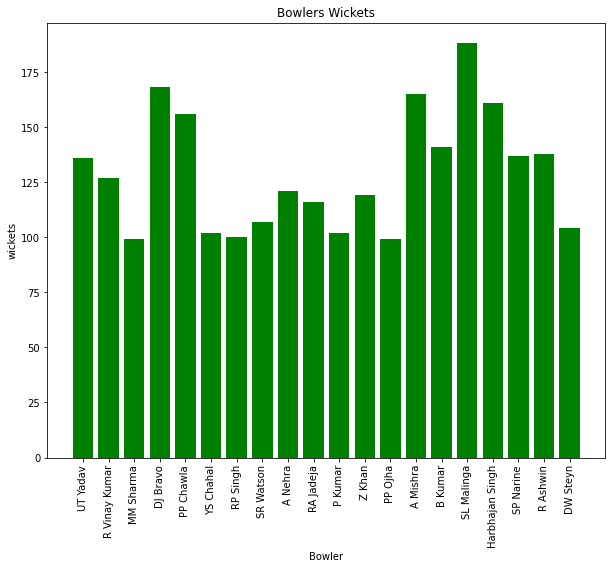

In [54]:
#code

# Top 5 Bowlers

Text(0.5, 1.0, 'Top 5 Bowlers')

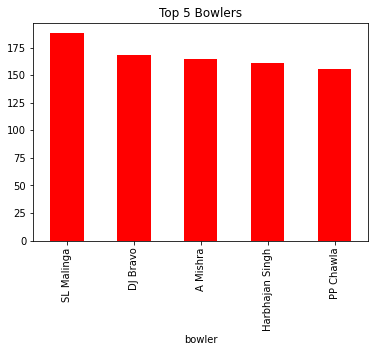

In [55]:
#code

## 5. Conclusion:
write conclusion here